# 1. Random Number Integration

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def f(x):
  '''
    Given function to demonstrate random point integration.
    x: input value
    Returns: value of the function at x
    '''
  return x + (np.sin(x)) ** 2

In [ ]:
def random_point_integration(f, x_bounds, y_bounds, N):
    '''
    Estimates the integral of a function f(x) within a bounding box using the hit-and-miss Monte Carlo method.
    f: function to integrate
    x_bounds: tuple (x_min, x_max) defining the range of x values
    y_bounds: tuple (y_min, y_max) defining the range of y values
    N: number of random points to generate
    Returns: estimate of the integral, arrays of random x and y coordinates, and an array indicating hits
    '''
    # Generate random points within the bounding box
    x_random = np.random.uniform(*x_bounds, N)
    y_random = np.random.uniform(*y_bounds, N)

    # Check if points are below the curve defined by f(x)
    hits = y_random < f(x_random)

    # Calculate the area of the bounding box
    rect_area = (x_bounds[1] - x_bounds[0]) * (y_bounds[1] - y_bounds[0])

    # Estimate the integral as the area of the rectangle times the ratio of points below the curve
    integral_estimate = rect_area * (hits.sum() / N)

    return integral_estimate, x_random, y_random, hits

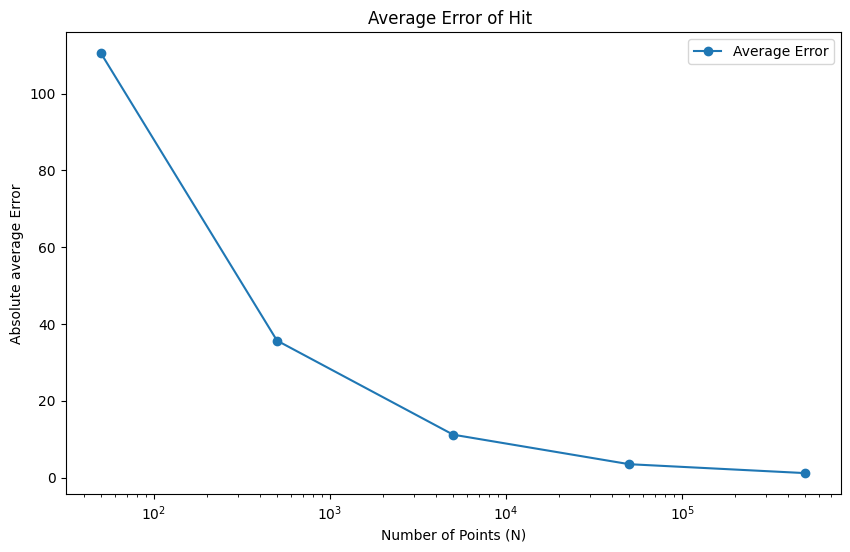

In [ ]:
x_bounds = (0, 2*np.pi)
y_bounds = (0, max(f(x_bounds[1]), f(x_bounds[0])))

# Analytical solution for the integral
# integral of x+sin(x)^2 = (x^2)/2 + x/2 + 1/4 * sin(2x)
analytical_solution = ((2*np.pi)**2)/2 + np.pi

# Different numbers of points for the estimation
N_values = [50, 500, 5000, 50000, 500000]
errors = []

# Test each number of points 10 times
for N in N_values:
    error_sum = 0
    for _ in range(500):
        estimate, _, _, _ = random_point_integration(f, x_bounds, y_bounds, N)
        error_sum += abs(estimate - analytical_solution)
    average_error = error_sum / 10
    errors.append(average_error)

# Plot the error as a function of the number of points
plt.figure(figsize=(10, 6))
plt.plot(N_values, errors, 'o-', label='Average Error')
plt.xscale('log')
plt.xlabel('Number of Points (N)')
plt.ylabel('Absolute average Error')
plt.title('Average Error of Hit ')
plt.legend()
plt.show()

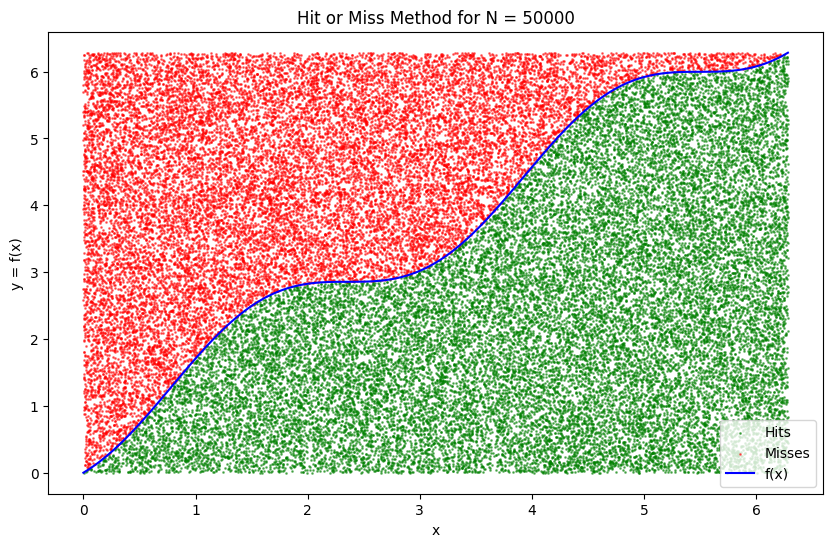

In [ ]:
# Plot the hit and miss method for a specific N value
N = 50000
estimate, x_random, y_random, hits = random_point_integration(f, x_bounds, y_bounds, N)
plt.figure(figsize=(10, 6))
plt.scatter(x_random[hits], y_random[hits], color='green', s=1, label='Hits', alpha=0.5)
plt.scatter(x_random[~hits], y_random[~hits], color='red', s=1, label='Misses', alpha=0.5)
plt.plot(np.linspace(*x_bounds, 5000), f(np.linspace(*x_bounds, 5000)), label='f(x)', color='blue')
plt.xlabel('x')
plt.ylabel('y = f(x)')
plt.title('Hit or Miss Method for N = {}'.format(N))
plt.legend()
plt.show()


# 2. Ising Model

In [ ]:
def initial_state(N):
    '''
    Generates an initial state for the 2D Ising model.
    N: size of the lattice (NxN)
    Returns: NxN numpy array with random spins (-1 or 1)
    '''
    return np.random.choice([-1, 1], size=(N, N))

def monte_carlo_step(state, beta):
    '''
    Performs one Monte Carlo step using the Metropolis algorithm for the 2D Ising model.
    state: current state of the lattice
    beta: inverse temperature (1/kT)
    Returns: updated state of the lattice
    '''
    N = state.shape[0]
    for _ in range(N**2):
        i, j = np.random.randint(0, N, size=2)
        s = state[i, j]
        nb = state[(i+1)%N, j] + state[i, (j+1)%N] + state[(i-1)%N, j] + state[i, (j-1)%N]
        delta_E = 2 * s * nb
        if delta_E < 0 or np.random.rand() < np.exp(-delta_E * beta):
            state[i, j] = -s
    return state

def calculate_magnetization(state):
    '''
    Calculates the magnetization of the lattice.
    state: current state of the lattice
    Returns: absolute value of the average spin
    '''
    return np.abs(np.mean(state))

def simulate(N, T, num_steps):
    '''
    Simulates the 2D Ising model and calculates the average magnetization.
    N: size of the lattice (NxN)
    T: temperature
    num_steps: number of Monte Carlo steps to perform
    Returns: average magnetization after equilibration
    '''
    state = initial_state(N)
    beta = 1 / T
    magnetizations = []
    for _ in range(num_steps):
        state = monte_carlo_step(state, beta)
        if _ > num_steps // 2:  # Discard the first half of the steps to allow for equilibration
            magnetizations.append(calculate_magnetization(state))
    return np.mean(magnetizations)

In [ ]:
# Parameters
N = 10  # Lattice size
T_range = np.linspace(1, 4, 500)  # Temperature range
num_steps = 500  # Number of Monte Carlo steps

# Run simulation
magnetizations = [simulate(N, T, num_steps) for T in T_range]

Estimated Curie Temperature: 2.87


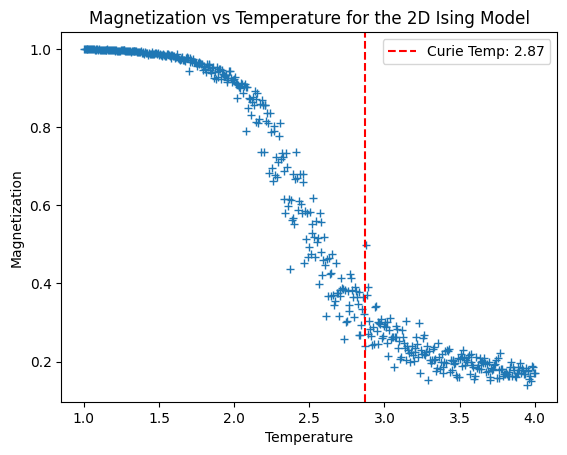

In [ ]:
# Plot magnetization vs temperature
plt.plot(T_range, magnetizations, marker='+', linestyle = 'None')
plt.xlabel('Temperature')
plt.ylabel('Magnetization')
plt.title('Magnetization vs Temperature for the 2D Ising Model')

# Estimate Curie temperature
T_c = T_range[np.argmax(np.diff(magnetizations))]
print(f"Estimated Curie Temperature: {T_c:.2f}")
# Line for the Curie temperature
plt.axvline(x=T_c, color='red', linestyle ='--', label=f'Curie Temp: {T_c:.2f}')
plt.legend()

plt.show()